## spacy_text_classification : Exercise

- In this exercise, you are going to classify whether a given text belongs to one of possible classes ['BUSINESS', 'SPORTS', 'CRIME'].

- you are going to use spacy for pre-processing the text, convert text to numbers and apply different classification algorithms.

In [1]:
import spacy

In [2]:
nlp = spacy.load("en_core_web_lg")

#### About Data: News Category Classifier
- Credits: https://www.kaggle.com/datasets/rmisra/news-category-dataset

- This data consists of two columns. - Text - Category
- Text are the description about a particular topic.
- Category determine which class the text belongs to.
- we have classes mainly of 'BUSINESS', 'SPORTS', 'CRIME' and comes under Multi-class classification Problem.

In [3]:
import pandas as pd

In [4]:
df = pd.read_json('dataset/News_Category_Dataset_v3.json', lines = True)

In [5]:
df.shape

(209527, 6)

In [6]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [7]:
df.category.value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [8]:
min_sample = 3562

In [9]:
df_bussiness = df[(df.category == "BUSINESS")].sample(min_sample, random_state = 2022)

In [10]:
df_sports = df[(df.category == "SPORTS")].sample(min_sample, random_state = 2022)

In [11]:
df_crime = df[(df.category == "CRIME")].sample(min_sample, random_state = 2022)

In [12]:
df_balanced = pd.concat([df_bussiness, df_sports, df_crime], axis = 0)

In [13]:
df_balanced.category.value_counts()

category
BUSINESS    3562
SPORTS      3562
CRIME       3562
Name: count, dtype: int64

In [14]:
df_balanced['label_num'] = df_balanced['category'].map({
    "BUSINESS": 0,
    "SPORTS": 1,
    "CRIME": 2
})

In [15]:
df_balanced.head()

,link,headline,category,short_description,authors,date,label_num
181516,https://www.huffingtonpost.com/entry/entrepren...,Entrepreneurism: Lots of Little Traumas and No...,BUSINESS,"I loved my years in corporate America, which I...","Liz Ryan, Contributor\nSpeaker, writer, sopran...",2012-11-25,0
58552,https://www.huffingtonpost.com/entry/tesla-fas...,Tesla Just Unveiled The Quickest Car You Can A...,BUSINESS,A new battery upgrade extends the range of the...,"Alexandria Sage, Reuters",2016-08-23,0
155102,https://www.huffingtonpost.com/entry/workers-p...,90 Percent Of Employers Tie Workers' Pay To Co...,BUSINESS,Caterpillar will not break any profit records ...,"Reuters, Reuters",2013-09-01,0
71725,https://www.huffingtonpost.com/entry/us-tax-ha...,One Of Ben Carson's Craziest Ideas Is Coming True,BUSINESS,The U.S. is the world's hottest new tax haven.,Ben Walsh,2016-03-26,0
80455,https://www.huffingtonpost.comhttp://www.bloom...,CEO Who Price Gouged HIV Drug Arrested For Sec...,BUSINESS,"A boyish drug company entrepreneur, who rocket...",,2015-12-17,0


In [16]:
df_balanced['short_description'] = df_balanced['headline'] + " " + df_balanced['short_description']

In [17]:
df_balanced.head()

,link,headline,category,short_description,authors,date,label_num
181516,https://www.huffingtonpost.com/entry/entrepren...,Entrepreneurism: Lots of Little Traumas and No...,BUSINESS,Entrepreneurism: Lots of Little Traumas and No...,"Liz Ryan, Contributor\nSpeaker, writer, sopran...",2012-11-25,0
58552,https://www.huffingtonpost.com/entry/tesla-fas...,Tesla Just Unveiled The Quickest Car You Can A...,BUSINESS,Tesla Just Unveiled The Quickest Car You Can A...,"Alexandria Sage, Reuters",2016-08-23,0
155102,https://www.huffingtonpost.com/entry/workers-p...,90 Percent Of Employers Tie Workers' Pay To Co...,BUSINESS,90 Percent Of Employers Tie Workers' Pay To Co...,"Reuters, Reuters",2013-09-01,0
71725,https://www.huffingtonpost.com/entry/us-tax-ha...,One Of Ben Carson's Craziest Ideas Is Coming True,BUSINESS,One Of Ben Carson's Craziest Ideas Is Coming T...,Ben Walsh,2016-03-26,0
80455,https://www.huffingtonpost.comhttp://www.bloom...,CEO Who Price Gouged HIV Drug Arrested For Sec...,BUSINESS,CEO Who Price Gouged HIV Drug Arrested For Sec...,,2015-12-17,0


#### Preprocess the text

In [18]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [19]:
df_balanced['preprocessed_txt'] = df_balanced['short_description'].apply(preprocess)

In [20]:
df_balanced.head()

,link,headline,category,short_description,authors,date,label_num,preprocessed_txt
181516,https://www.huffingtonpost.com/entry/entrepren...,Entrepreneurism: Lots of Little Traumas and No...,BUSINESS,Entrepreneurism: Lots of Little Traumas and No...,"Liz Ryan, Contributor\nSpeaker, writer, sopran...",2012-11-25,0,entrepreneurism lot little trauma Big Ones lov...
58552,https://www.huffingtonpost.com/entry/tesla-fas...,Tesla Just Unveiled The Quickest Car You Can A...,BUSINESS,Tesla Just Unveiled The Quickest Car You Can A...,"Alexandria Sage, Reuters",2016-08-23,0,Tesla unveil quick car actually buy new batter...
155102,https://www.huffingtonpost.com/entry/workers-p...,90 Percent Of Employers Tie Workers' Pay To Co...,BUSINESS,90 Percent Of Employers Tie Workers' Pay To Co...,"Reuters, Reuters",2013-09-01,0,90 percent Employers Tie worker pay company pe...
71725,https://www.huffingtonpost.com/entry/us-tax-ha...,One Of Ben Carson's Craziest Ideas Is Coming True,BUSINESS,One Of Ben Carson's Craziest Ideas Is Coming T...,Ben Walsh,2016-03-26,0,Ben Carson crazy Ideas come true U.S. world ho...
80455,https://www.huffingtonpost.comhttp://www.bloom...,CEO Who Price Gouged HIV Drug Arrested For Sec...,BUSINESS,CEO Who Price Gouged HIV Drug Arrested For Sec...,,2015-12-17,0,ceo Price Gouged HIV drug arrest Securities Fr...


#### Get the spacy embeddings for each preprocessed text

In [21]:
df_balanced['vector'] = df_balanced['preprocessed_txt'].apply(lambda text: nlp(text).vector)

In [22]:
df_balanced.drop(['link', 'headline', 'short_description', 'authors', 'date'], axis = 1, inplace = True)

In [23]:
df_balanced.head()

,category,label_num,preprocessed_txt,vector
181516,BUSINESS,0,entrepreneurism lot little trauma Big Ones lov...,"[0.9806942, 1.0606105, -2.0383096, -0.14605239..."
58552,BUSINESS,0,Tesla unveil quick car actually buy new batter...,"[-0.26560172, 1.8556908, -3.590069, -0.1969631..."
155102,BUSINESS,0,90 percent Employers Tie worker pay company pe...,"[-1.166368, -1.3705631, -2.000635, 1.5855074, ..."
71725,BUSINESS,0,Ben Carson crazy Ideas come true U.S. world ho...,"[-0.85314053, 1.2086989, -1.5447077, 0.4923033..."
80455,BUSINESS,0,ceo Price Gouged HIV drug arrest Securities Fr...,"[-0.49781397, -0.5735012, -3.922238, 0.7729871..."


#### Train-Test splitting

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['vector'],
                                                    df_balanced['label_num'],
                                                    test_size = 0.2,
                                                    random_state = 2022,
                                                    stratify = df_balanced['label_num'])

In [26]:
X_train.shape

(8548,)

In [27]:
X_test.shape

(2138,)

In [28]:
X_train.values

array([array([ 1.59203485e-01, -1.41820049e+00, -1.29215169e+00,  3.48956019e-01,
               2.76856899e+00, -1.06823826e+00,  1.49726093e+00,  3.08209538e+00,
              -2.57370949e+00,  1.68690518e-01,  5.23509598e+00,  2.65473318e+00,
              -4.17325211e+00,  8.52781296e-01, -3.69902164e-01,  5.93105495e-01,
               3.32117963e+00, -5.98770499e-01, -1.88515270e+00,  6.58110917e-01,
               5.79253808e-02,  1.74756169e+00, -1.85604739e+00,  7.63560236e-01,
              -1.57340205e+00, -1.60825050e+00, -1.07904363e+00, -1.31255841e+00,
              -1.49803424e+00,  1.52211857e+00,  2.34908366e+00, -1.47348553e-01,
              -5.33593535e-01, -8.90945613e-01,  9.21908438e-01, -1.89952314e+00,
               7.87879467e-01,  1.33463597e+00,  1.83164883e+00,  2.77099997e-01,
              -1.25493839e-01,  6.32196128e-01, -5.58838069e-01,  1.18409717e+00,
              -1.50130939e+00,  1.61834514e+00,  2.23139596e+00, -2.11373544e+00,
               5

In [29]:
import numpy as np

In [30]:
X_train_2d = np.stack(X_train) # classfiers doesn't work well with a array of array type
                                # that's why we converted the vector into a higher dimensional array

In [31]:
X_train_2d

array([[ 0.15920348, -1.4182005 , -1.2921517 , ..., -2.4199314 ,
        -2.7287087 ,  1.392251  ],
       [-1.4811625 ,  0.46711496, -4.128814  , ...,  0.67164326,
        -0.34542203,  1.9379945 ],
       [-1.47229   ,  2.223345  , -3.0966084 , ...,  4.039047  ,
         0.07653011, -0.27687332],
       ...,
       [-0.40268692,  1.1015935 , -0.6241427 , ..., -1.7494621 ,
        -2.2945173 ,  2.2484758 ],
       [-0.9449867 , -0.06106063, -1.582688  , ..., -1.2193334 ,
        -0.9481359 ,  1.6531206 ],
       [-2.2456138 ,  0.03545007, -1.0037156 , ..., -0.93343425,
         0.56957805,  0.30254564]], dtype=float32)

In [32]:
X_test_2d = np.stack(X_test)

In [33]:
X_test_2d

array([[-1.6417899 ,  1.4635224 , -0.72485584, ..., -0.9719579 ,
        -0.585941  , -1.505303  ],
       [-0.6412912 ,  0.77750796, -2.8482816 , ..., -0.80032843,
        -1.9329405 ,  0.9919204 ],
       [-0.45623276,  1.8479369 , -1.9877771 , ...,  0.40833282,
        -1.588534  ,  1.3436894 ],
       ...,
       [ 0.60876197,  1.9530131 , -1.0425621 , ..., -0.23991214,
        -1.7356194 ,  0.5558342 ],
       [-1.1162387 , -2.201048  , -1.8929442 , ..., -0.8947224 ,
         0.28117996,  0.29346797],
       [-3.0737221 ,  2.7965808 ,  1.4762865 , ..., -0.7309665 ,
         0.283186  , -0.47994462]], dtype=float32)

#### Attempt 1:

- use spacy glove embeddings for text vectorization.

- use Decision Tree as the classifier.

- print the classification report.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [35]:
dt = DecisionTreeClassifier()

In [36]:
dt.fit(X_train_2d, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dt.predict(X_test_2d)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       713
           1       0.73      0.75      0.74       713
           2       0.75      0.74      0.74       712

    accuracy                           0.74      2138
   macro avg       0.74      0.74      0.74      2138
weighted avg       0.74      0.74      0.74      2138



#### Attempt 2:

- use spacy glove embeddings for text vectorization.
- use MultinomialNB as the classifier after applying the MinMaxscaler.
- print the classification report.

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

In [41]:
nb = MultinomialNB()
nb.fit(scaled_train_embed, y_train)

MultinomialNB()

In [42]:
y_pred = nb.predict(scaled_test_embed)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       713
           1       0.85      0.80      0.82       713
           2       0.85      0.90      0.87       712

    accuracy                           0.84      2138
   macro avg       0.84      0.84      0.84      2138
weighted avg       0.84      0.84      0.84      2138



#### Attempt 3:

- use spacy glove embeddings for text vectorization.
- use KNeighborsClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()

In [46]:
knn.fit(scaled_train_embed, y_train)

KNeighborsClassifier()

In [47]:
y_pred = knn.predict(scaled_test_embed)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       713
           1       0.91      0.84      0.88       713
           2       0.86      0.90      0.88       712

    accuracy                           0.87      2138
   macro avg       0.88      0.87      0.87      2138
weighted avg       0.88      0.87      0.87      2138



#### Attempt 4:

- use spacy glove embeddings for text vectorization.
- use RandomForestClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier()

In [51]:
rf.fit(scaled_train_embed, y_train)

RandomForestClassifier()

In [52]:
y_pred = rf.predict(scaled_test_embed)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       713
           1       0.89      0.87      0.88       713
           2       0.88      0.91      0.89       712

    accuracy                           0.88      2138
   macro avg       0.88      0.88      0.88      2138
weighted avg       0.88      0.88      0.88      2138



#### Attempt 5:

- use spacy glove embeddings for text vectorization.
- use GradientBoostingClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
clf = GradientBoostingClassifier()
clf.fit(scaled_train_embed, y_train)

GradientBoostingClassifier()

In [56]:
y_pred = clf.predict(scaled_test_embed)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       713
           1       0.90      0.88      0.89       713
           2       0.89      0.91      0.90       712

    accuracy                           0.90      2138
   macro avg       0.90      0.90      0.90      2138
weighted avg       0.90      0.90      0.90      2138



#### Print the confusion Matrix with the best model got

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[641,  39,  33],
       [ 42, 628,  43],
       [ 38,  27, 647]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

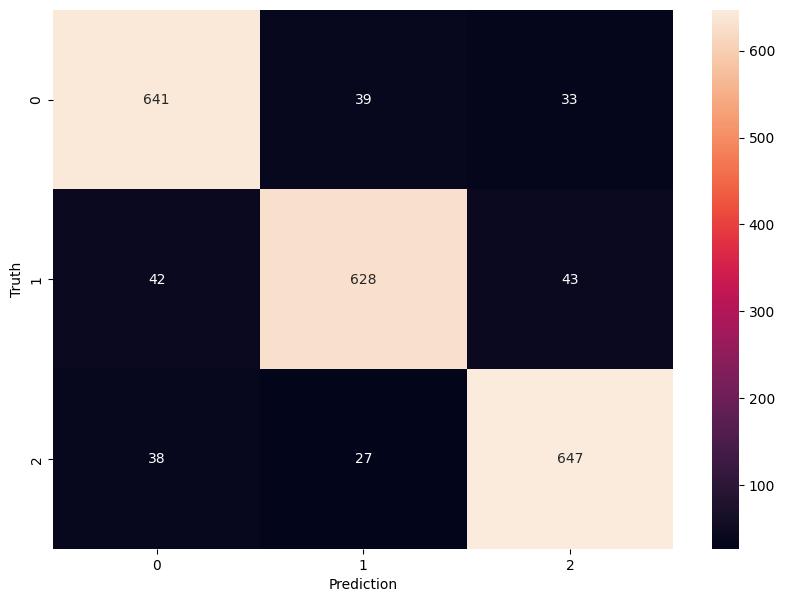

In [60]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')